# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Data Description:

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not

## Attaching Resources

### Importing Necessary Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
fc = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_14_Decision%20Trees/Dataset/Fraud_check.csv')

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fc_nrow = fc.shape[0]

In [4]:
def lost_record():

    fc_nrow_now = fc.shape[0]
    lost = fc_nrow - fc_nrow_now
    lost = (lost/fc_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [5]:
fc.describe()


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fc.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [9]:
uni(fc)


 All Unique Value in Undergrad
['NO' 'YES']
Total no of unique values 2

 All Unique Value in Marital.Status
['Divorced' 'Married' 'Single']
Total no of unique values 3

 All Unique Value in Taxable.Income
[10003 10150 10163 10329 10348 10379 10455 10735 10870 10900 10933 10987
 11784 11794 11804 11865 12011 12072 12083 12453 12470 12514 12659 12682
 12810 13068 13571 13747 14300 14310 14326 14398 14422 14912 15296 15491
 15532 15627 15673 15710 15853 16082 16264 16316 16320 16690 16992 17183
 17440 17783 17957 17962 18032 18192 18199 18572 18888 19060 19169 19184
 19272 19649 19925 20109 20309 20391 20604 20719 20851 21016 21337 21696
 21917 21945 21966 22054 22159 22187 22258 22773 23075 23480 23855 23884
 24215 24347 24370 24541 24557 24987 25062 25222 25766 26094 26101 26128
 26372 26494 26679 26741 26783 26793 26972 27081 27143 27394 27520 27684
 27698 27877 28449 28496 28707 28764 28904 29046 29222 29236 29385 29543
 29607 29732 29916 29944 30167 30468 30495 30714 31085 31088 31

### Checking for Duplicated Values

In [10]:
fc[fc.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

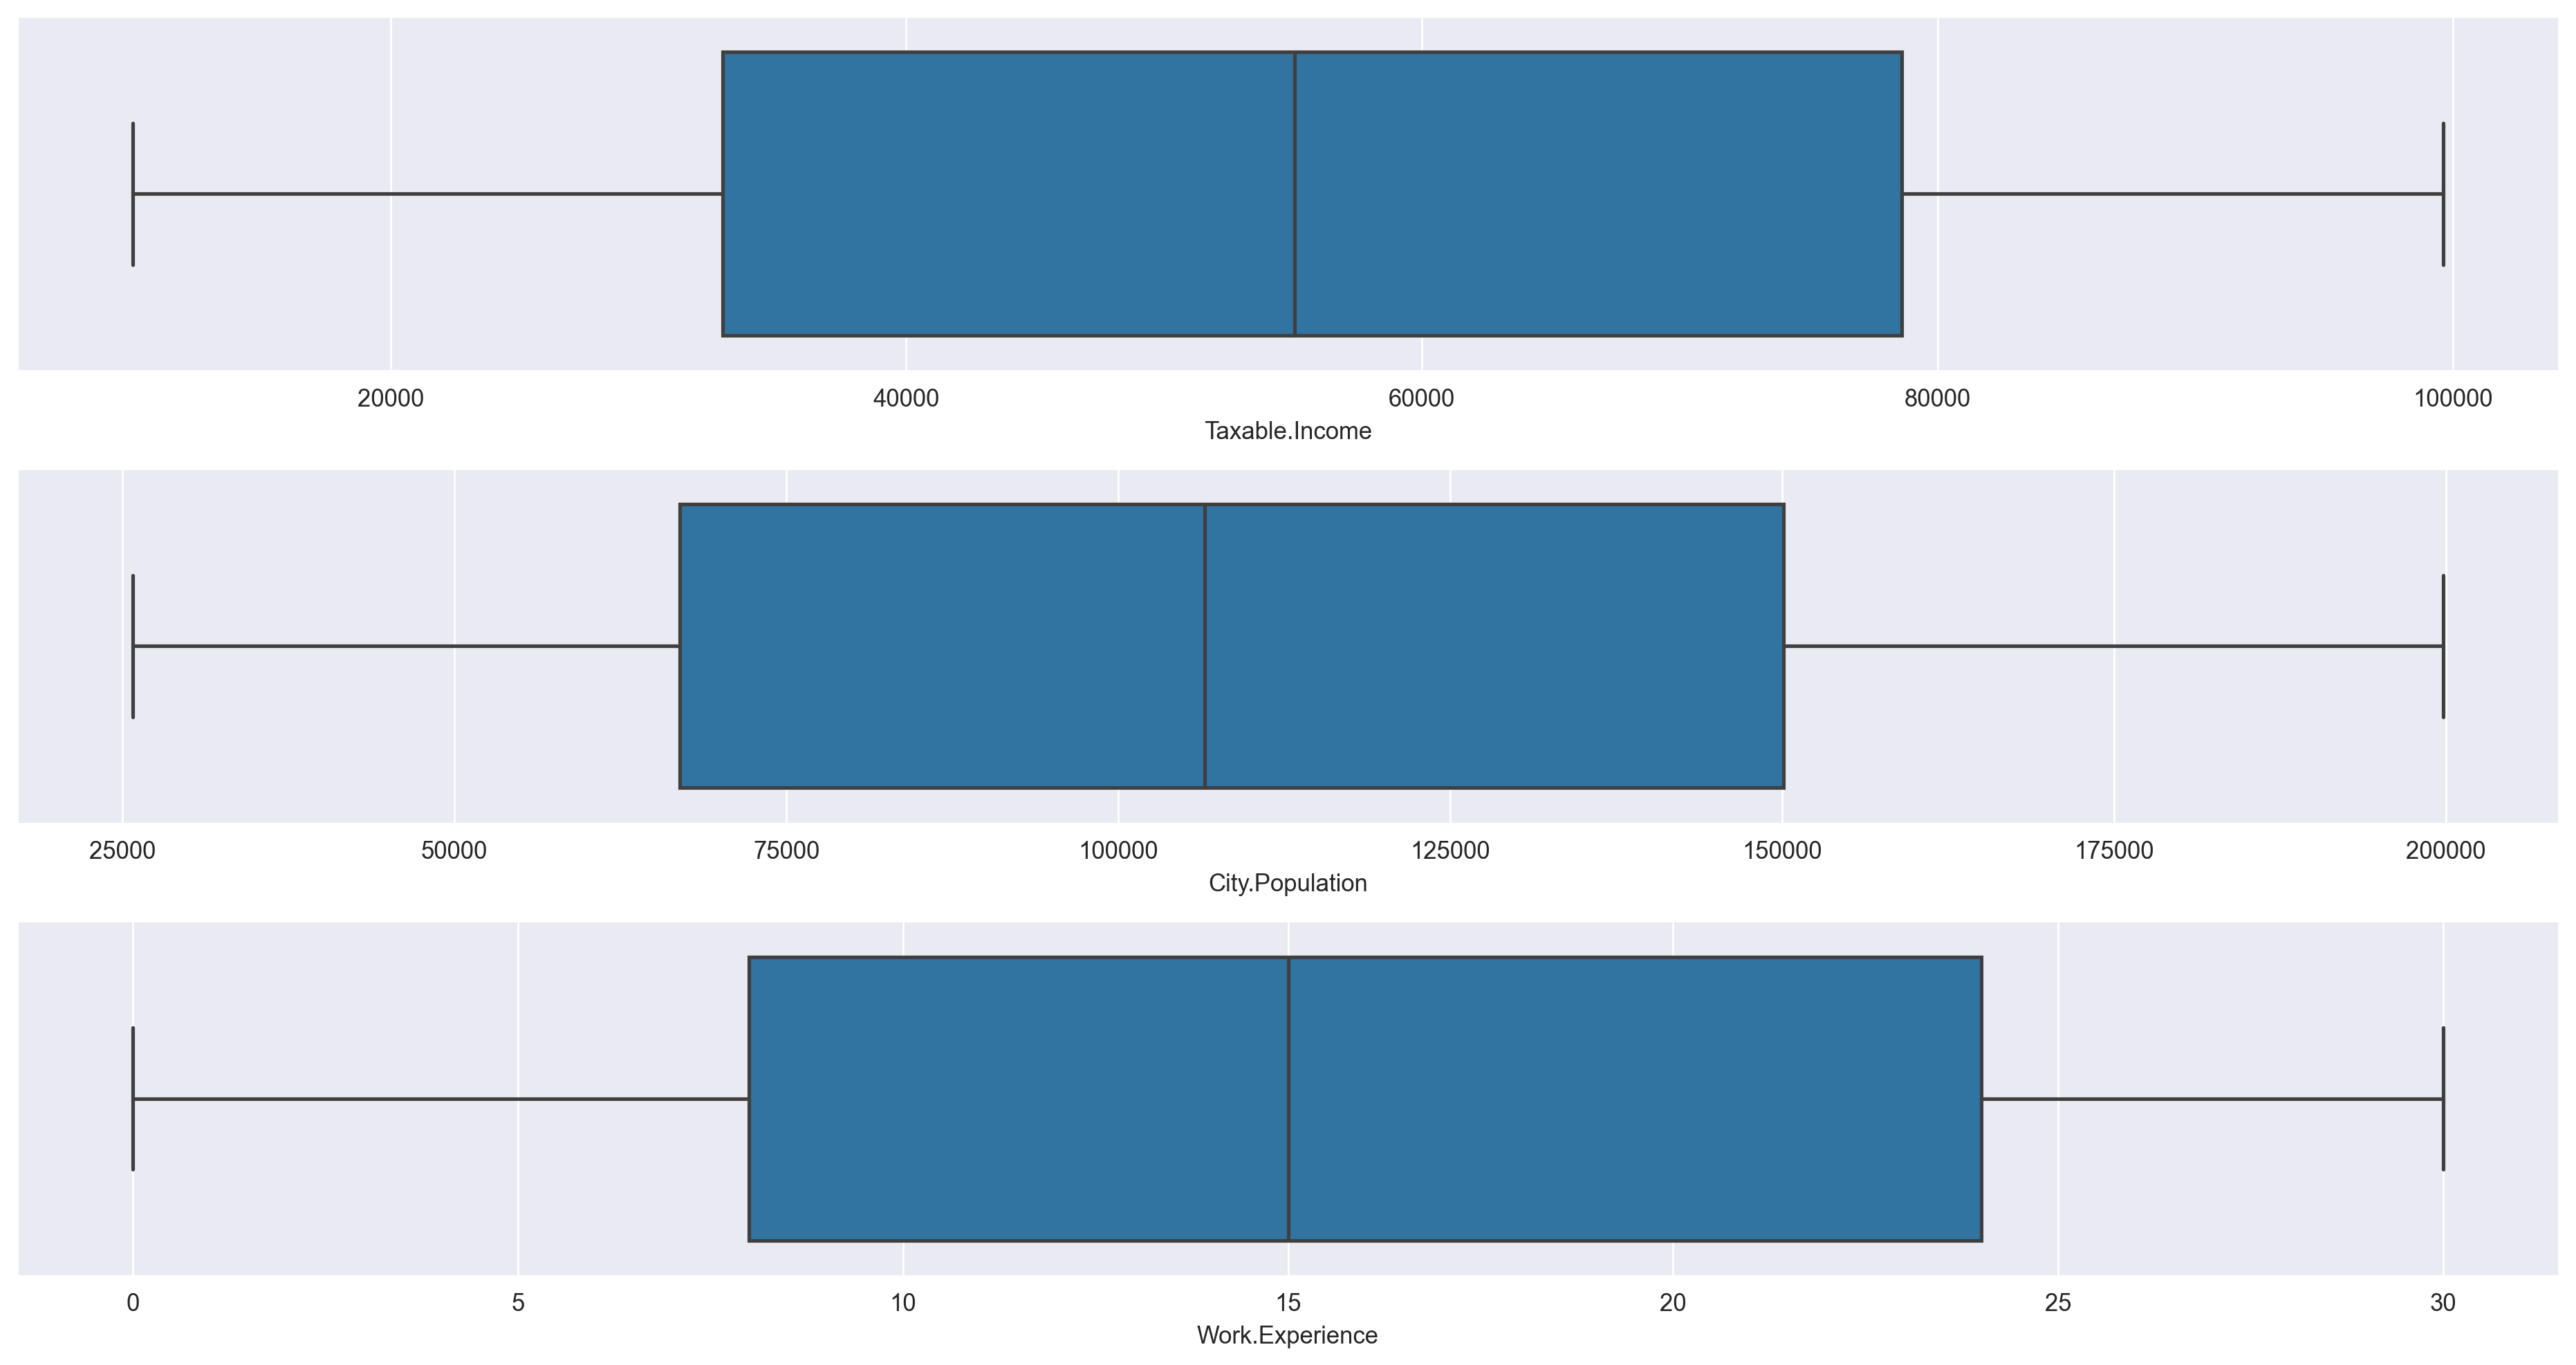

In [11]:
fig, ax = plt.subplots(nrows = 3)

sns.boxplot(fc['Taxable.Income'], ax = ax[0])
sns.boxplot(fc['City.Population'], ax = ax[1])
sns.boxplot(fc['Work.Experience'], ax = ax[2])

plt.tight_layout()


#### Ploting Histplot

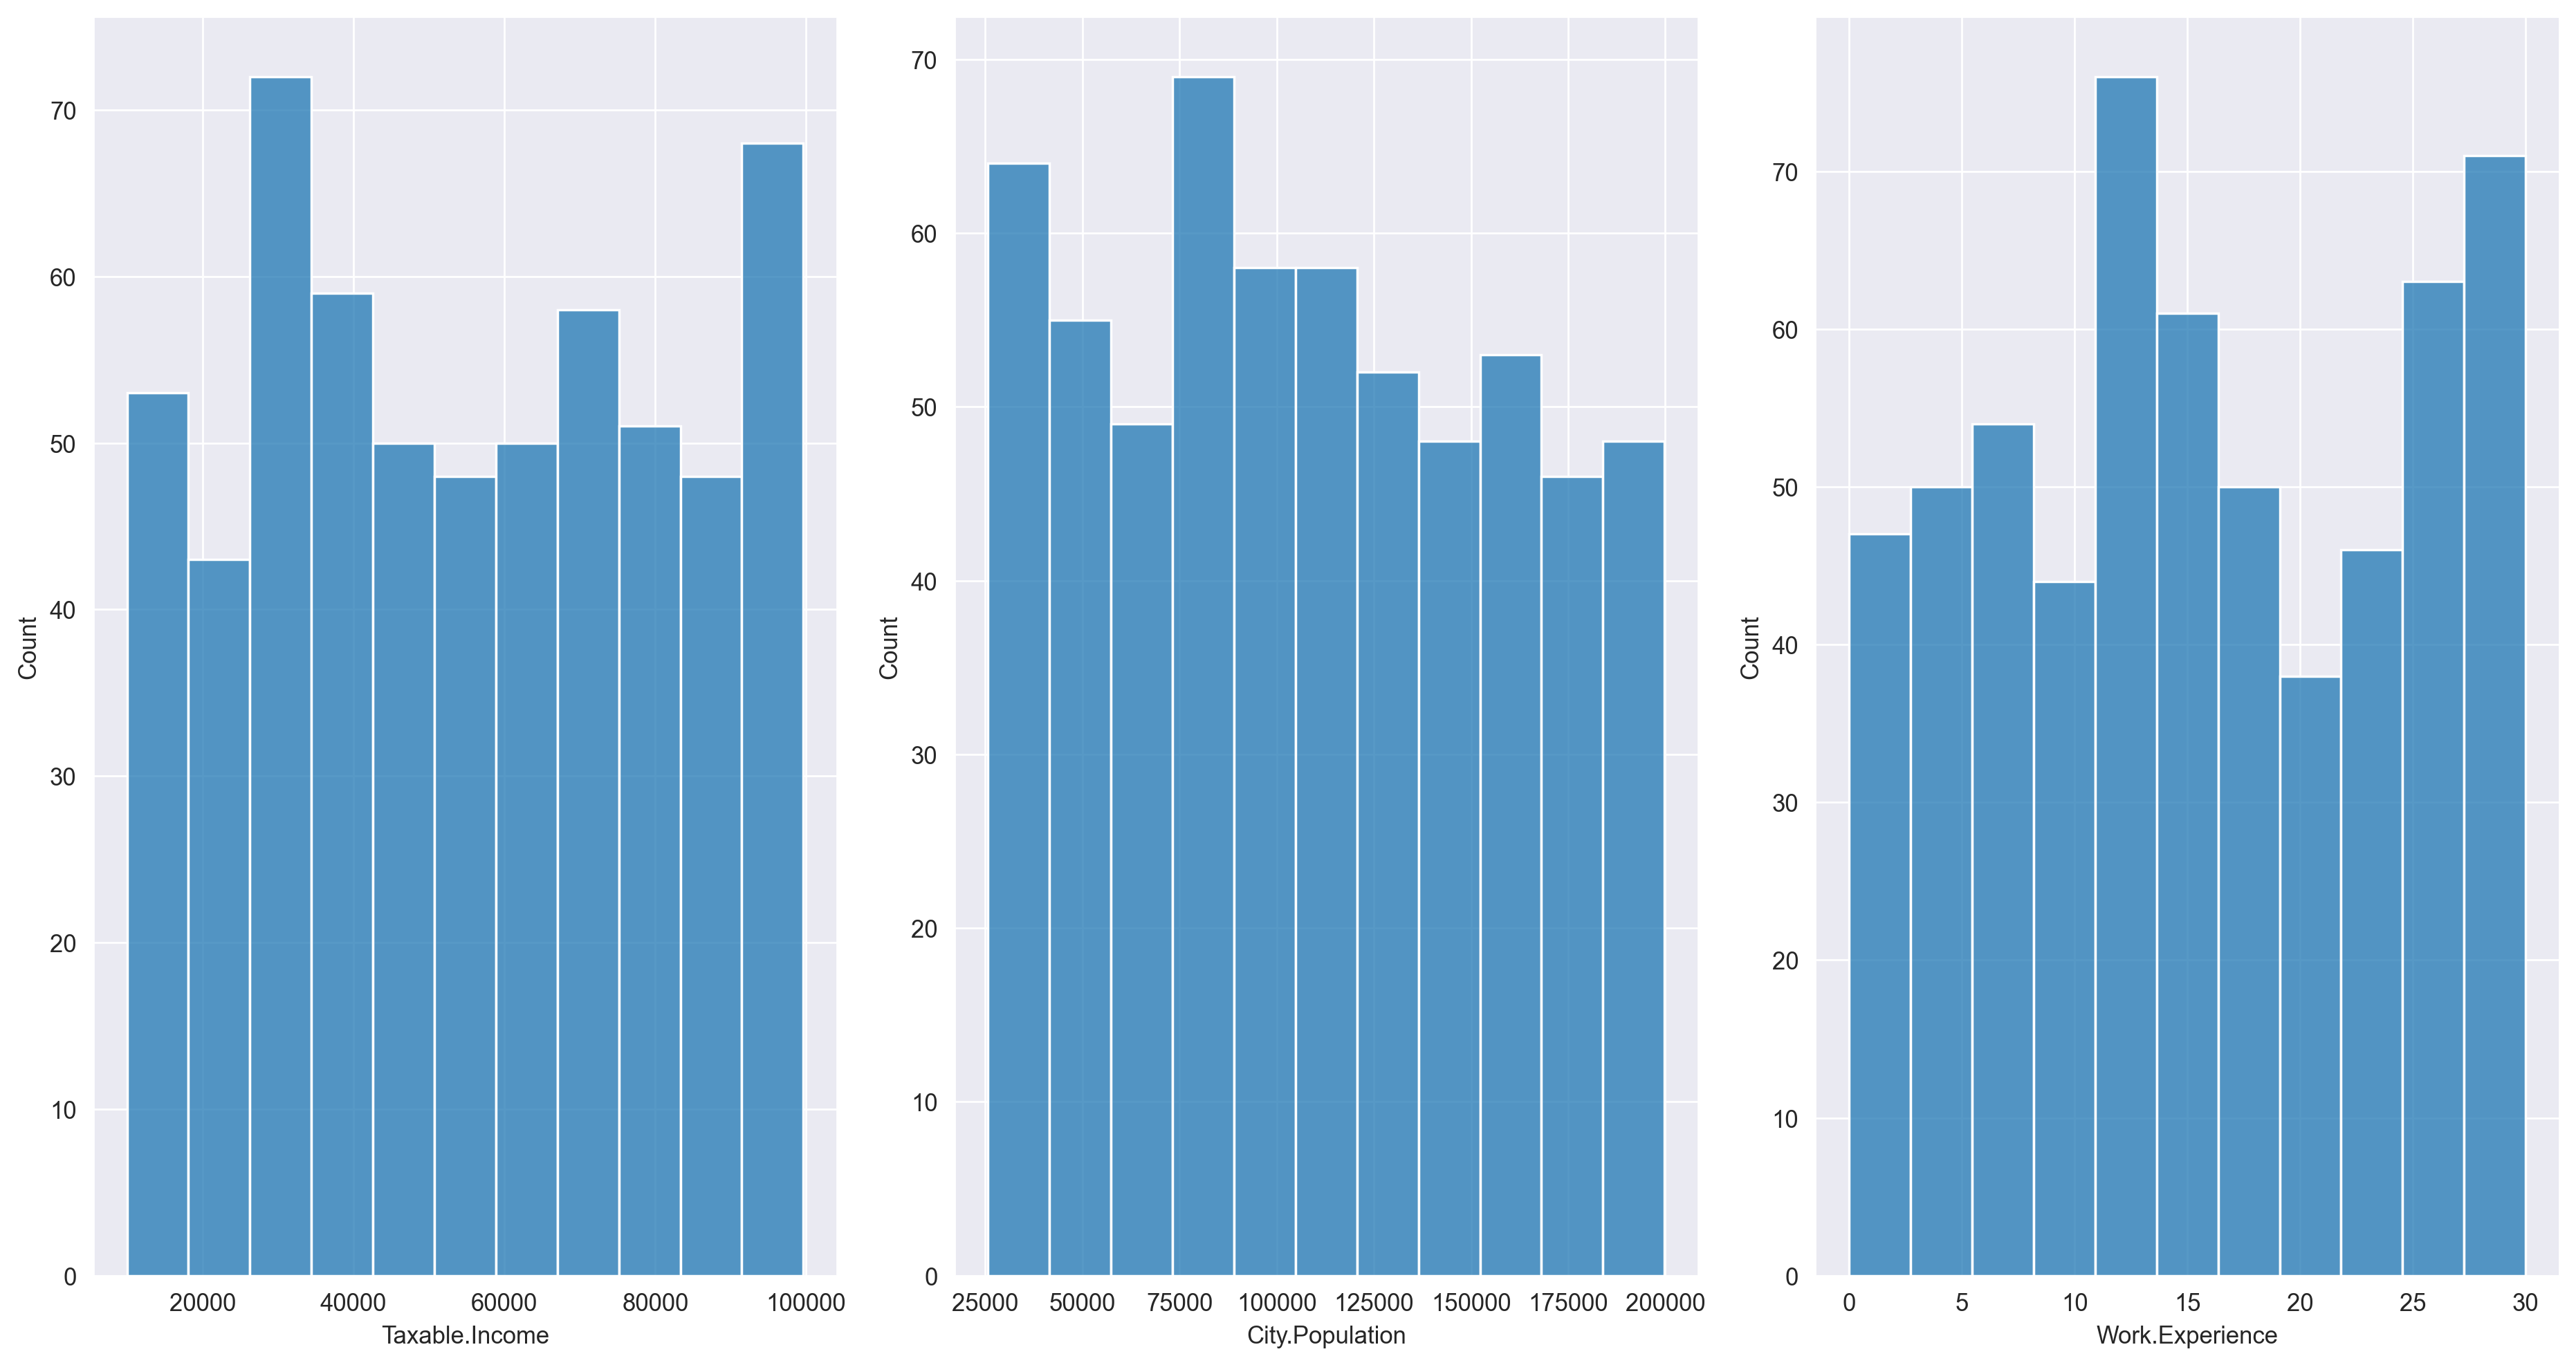

In [12]:
fig, ax = plt.subplots(ncols = 3)

sns.histplot(fc['Taxable.Income'], ax = ax[0])
sns.histplot(fc['City.Population'], ax = ax[1])
sns.histplot(fc['Work.Experience'], ax = ax[2])

plt.tight_layout()

#### Ploting QQ-Plot

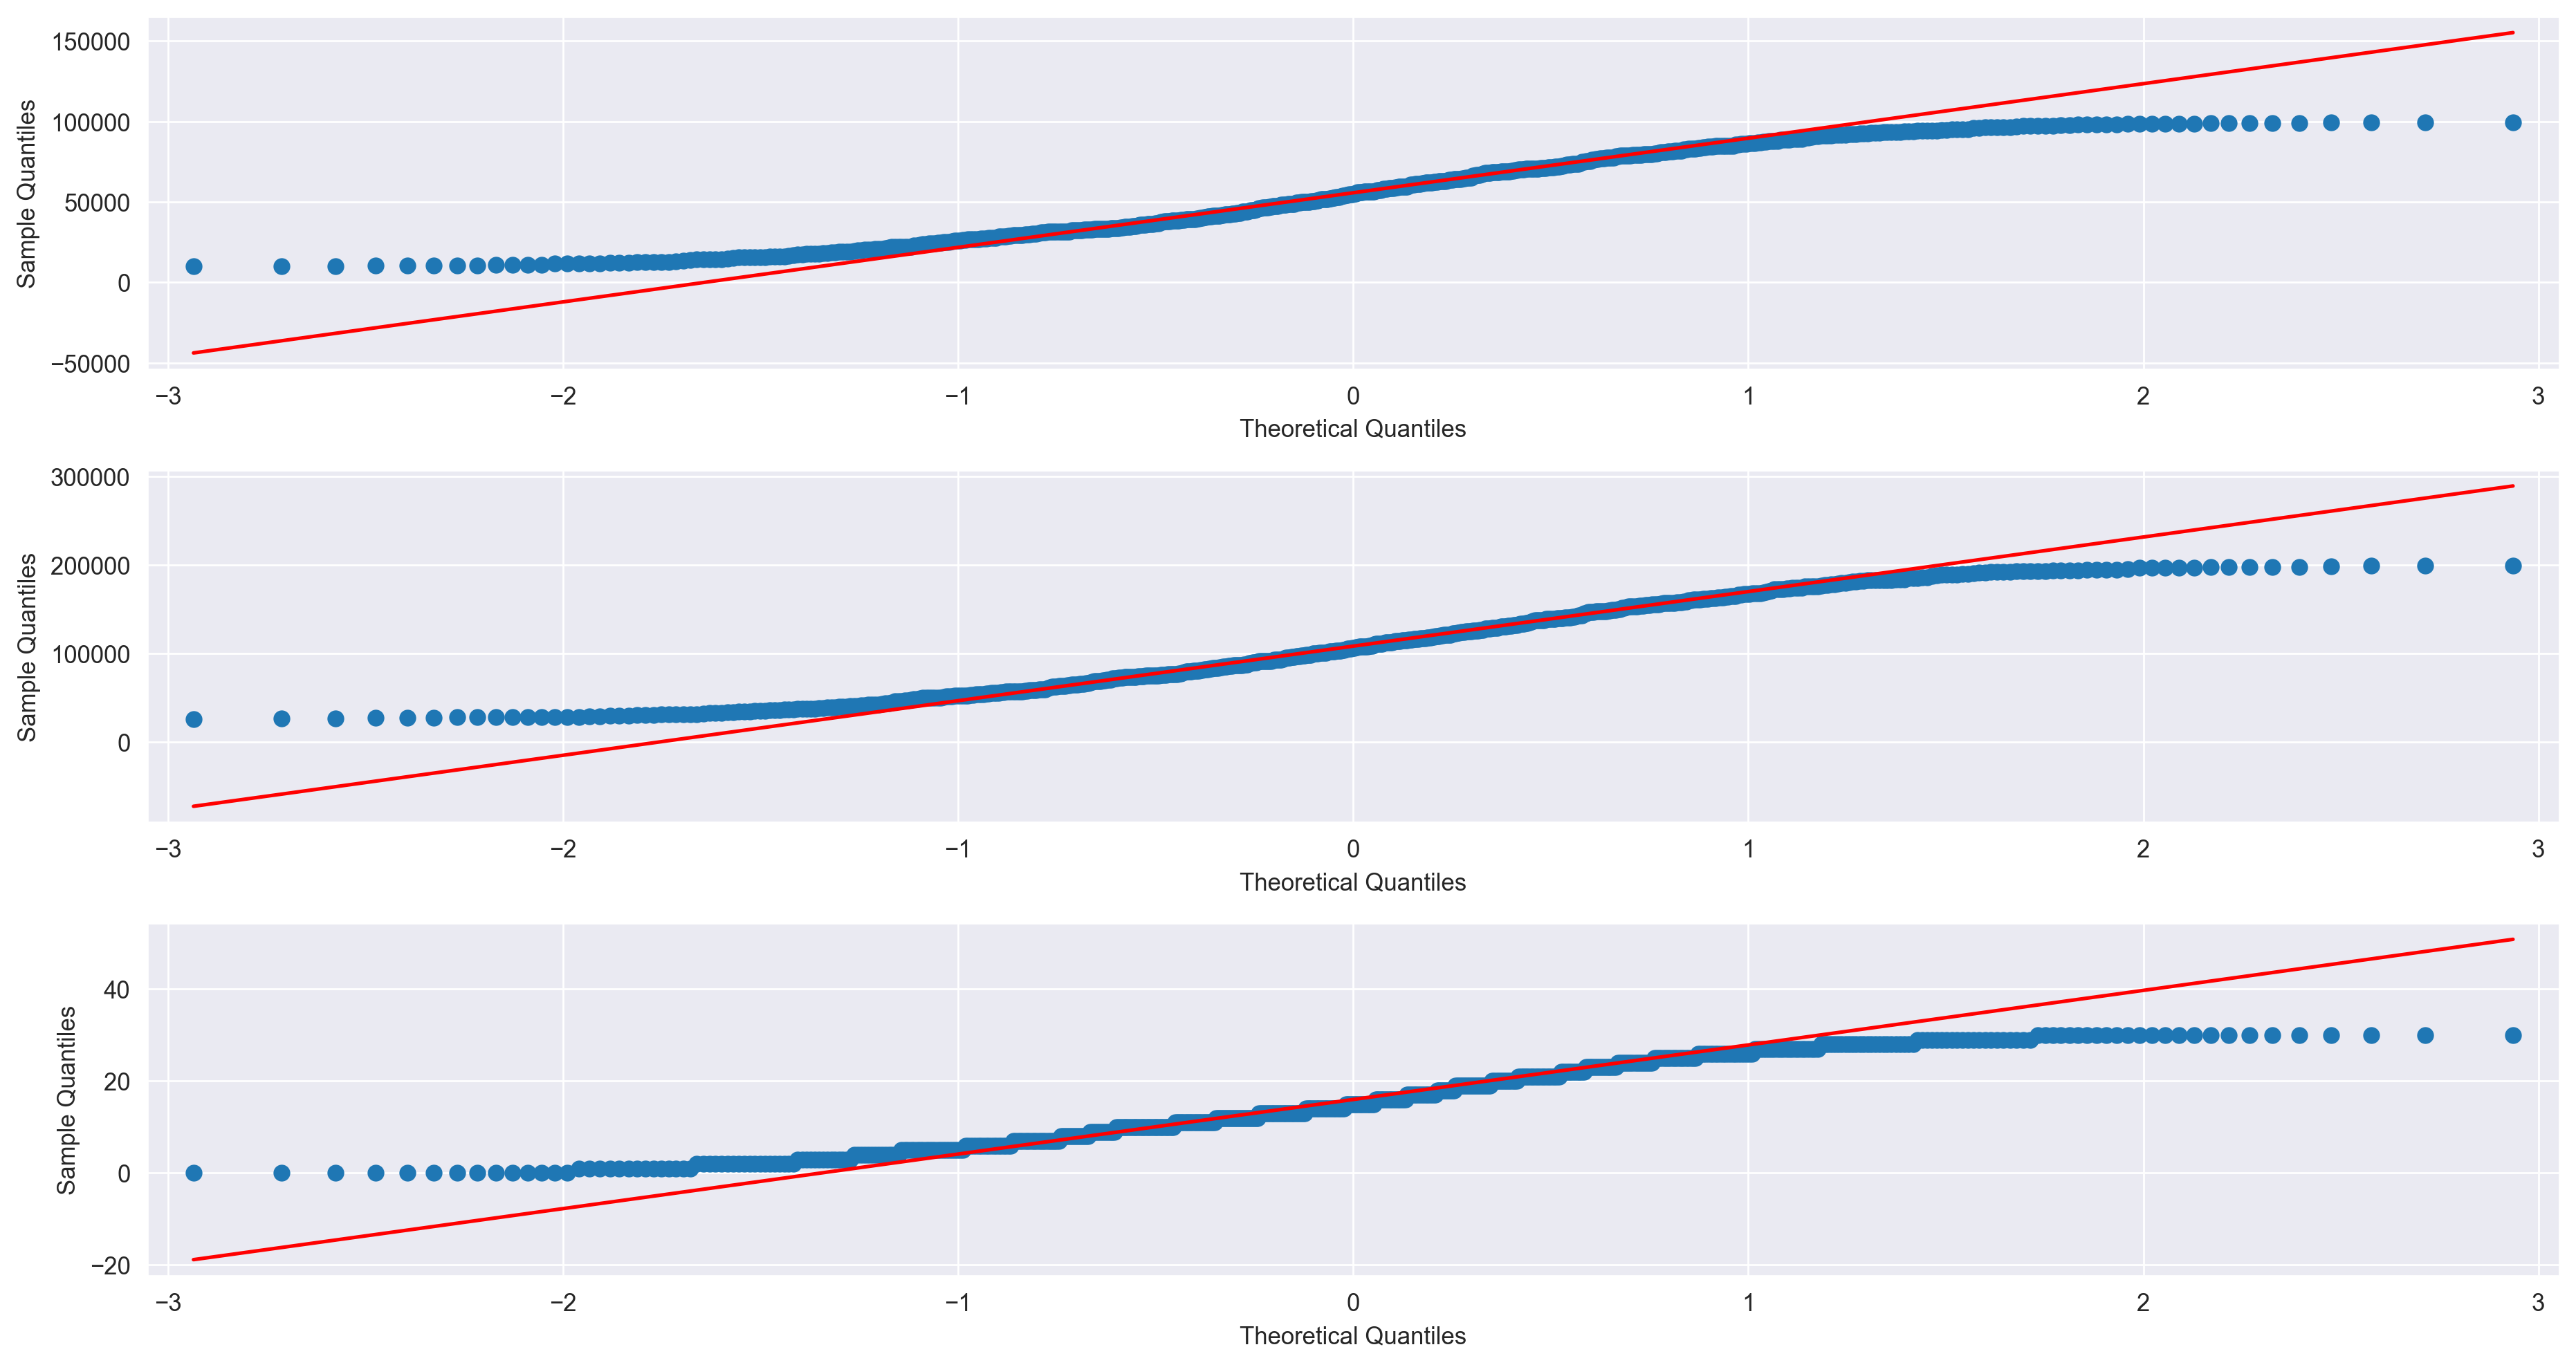

In [13]:
fig, ax = plt.subplots(nrows = 3)

sm.qqplot(fc['Taxable.Income'], ax = ax[0], line='q')
sm.qqplot(fc['City.Population'], ax = ax[1], line='q')
sm.qqplot(fc['Work.Experience'], ax = ax[2], line='q')

plt.tight_layout()


### Correlation Analysis

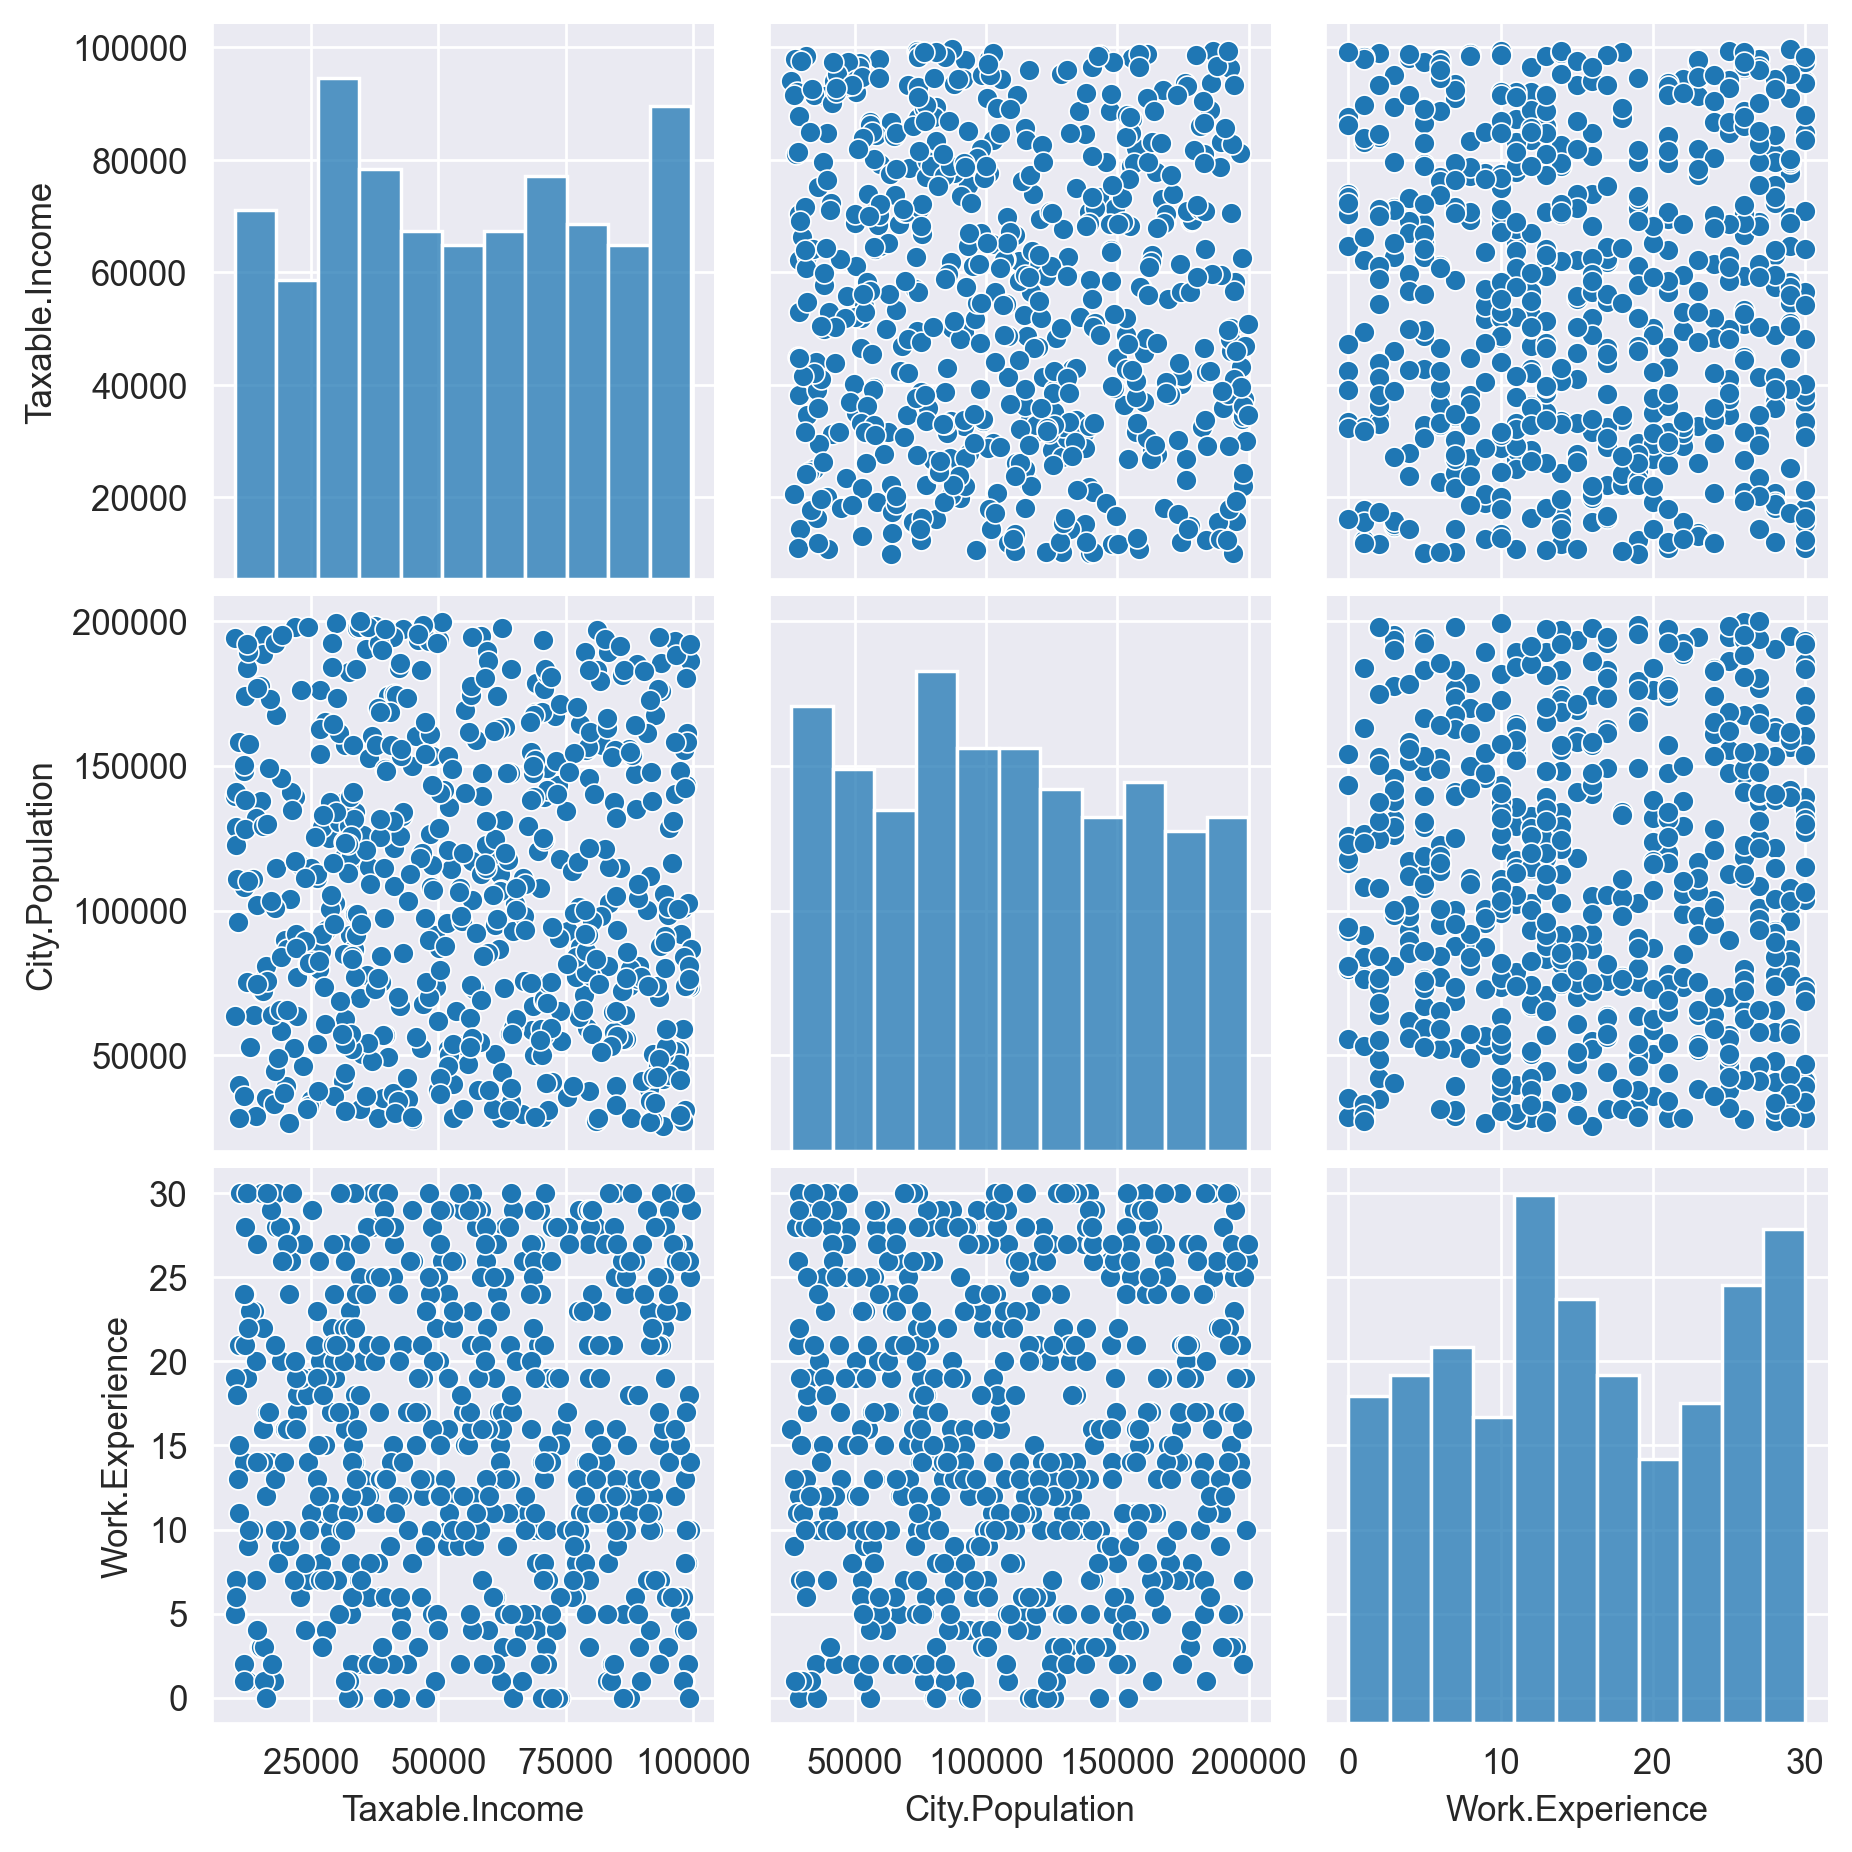

In [14]:
sns.pairplot(data=fc)

<AxesSubplot:>

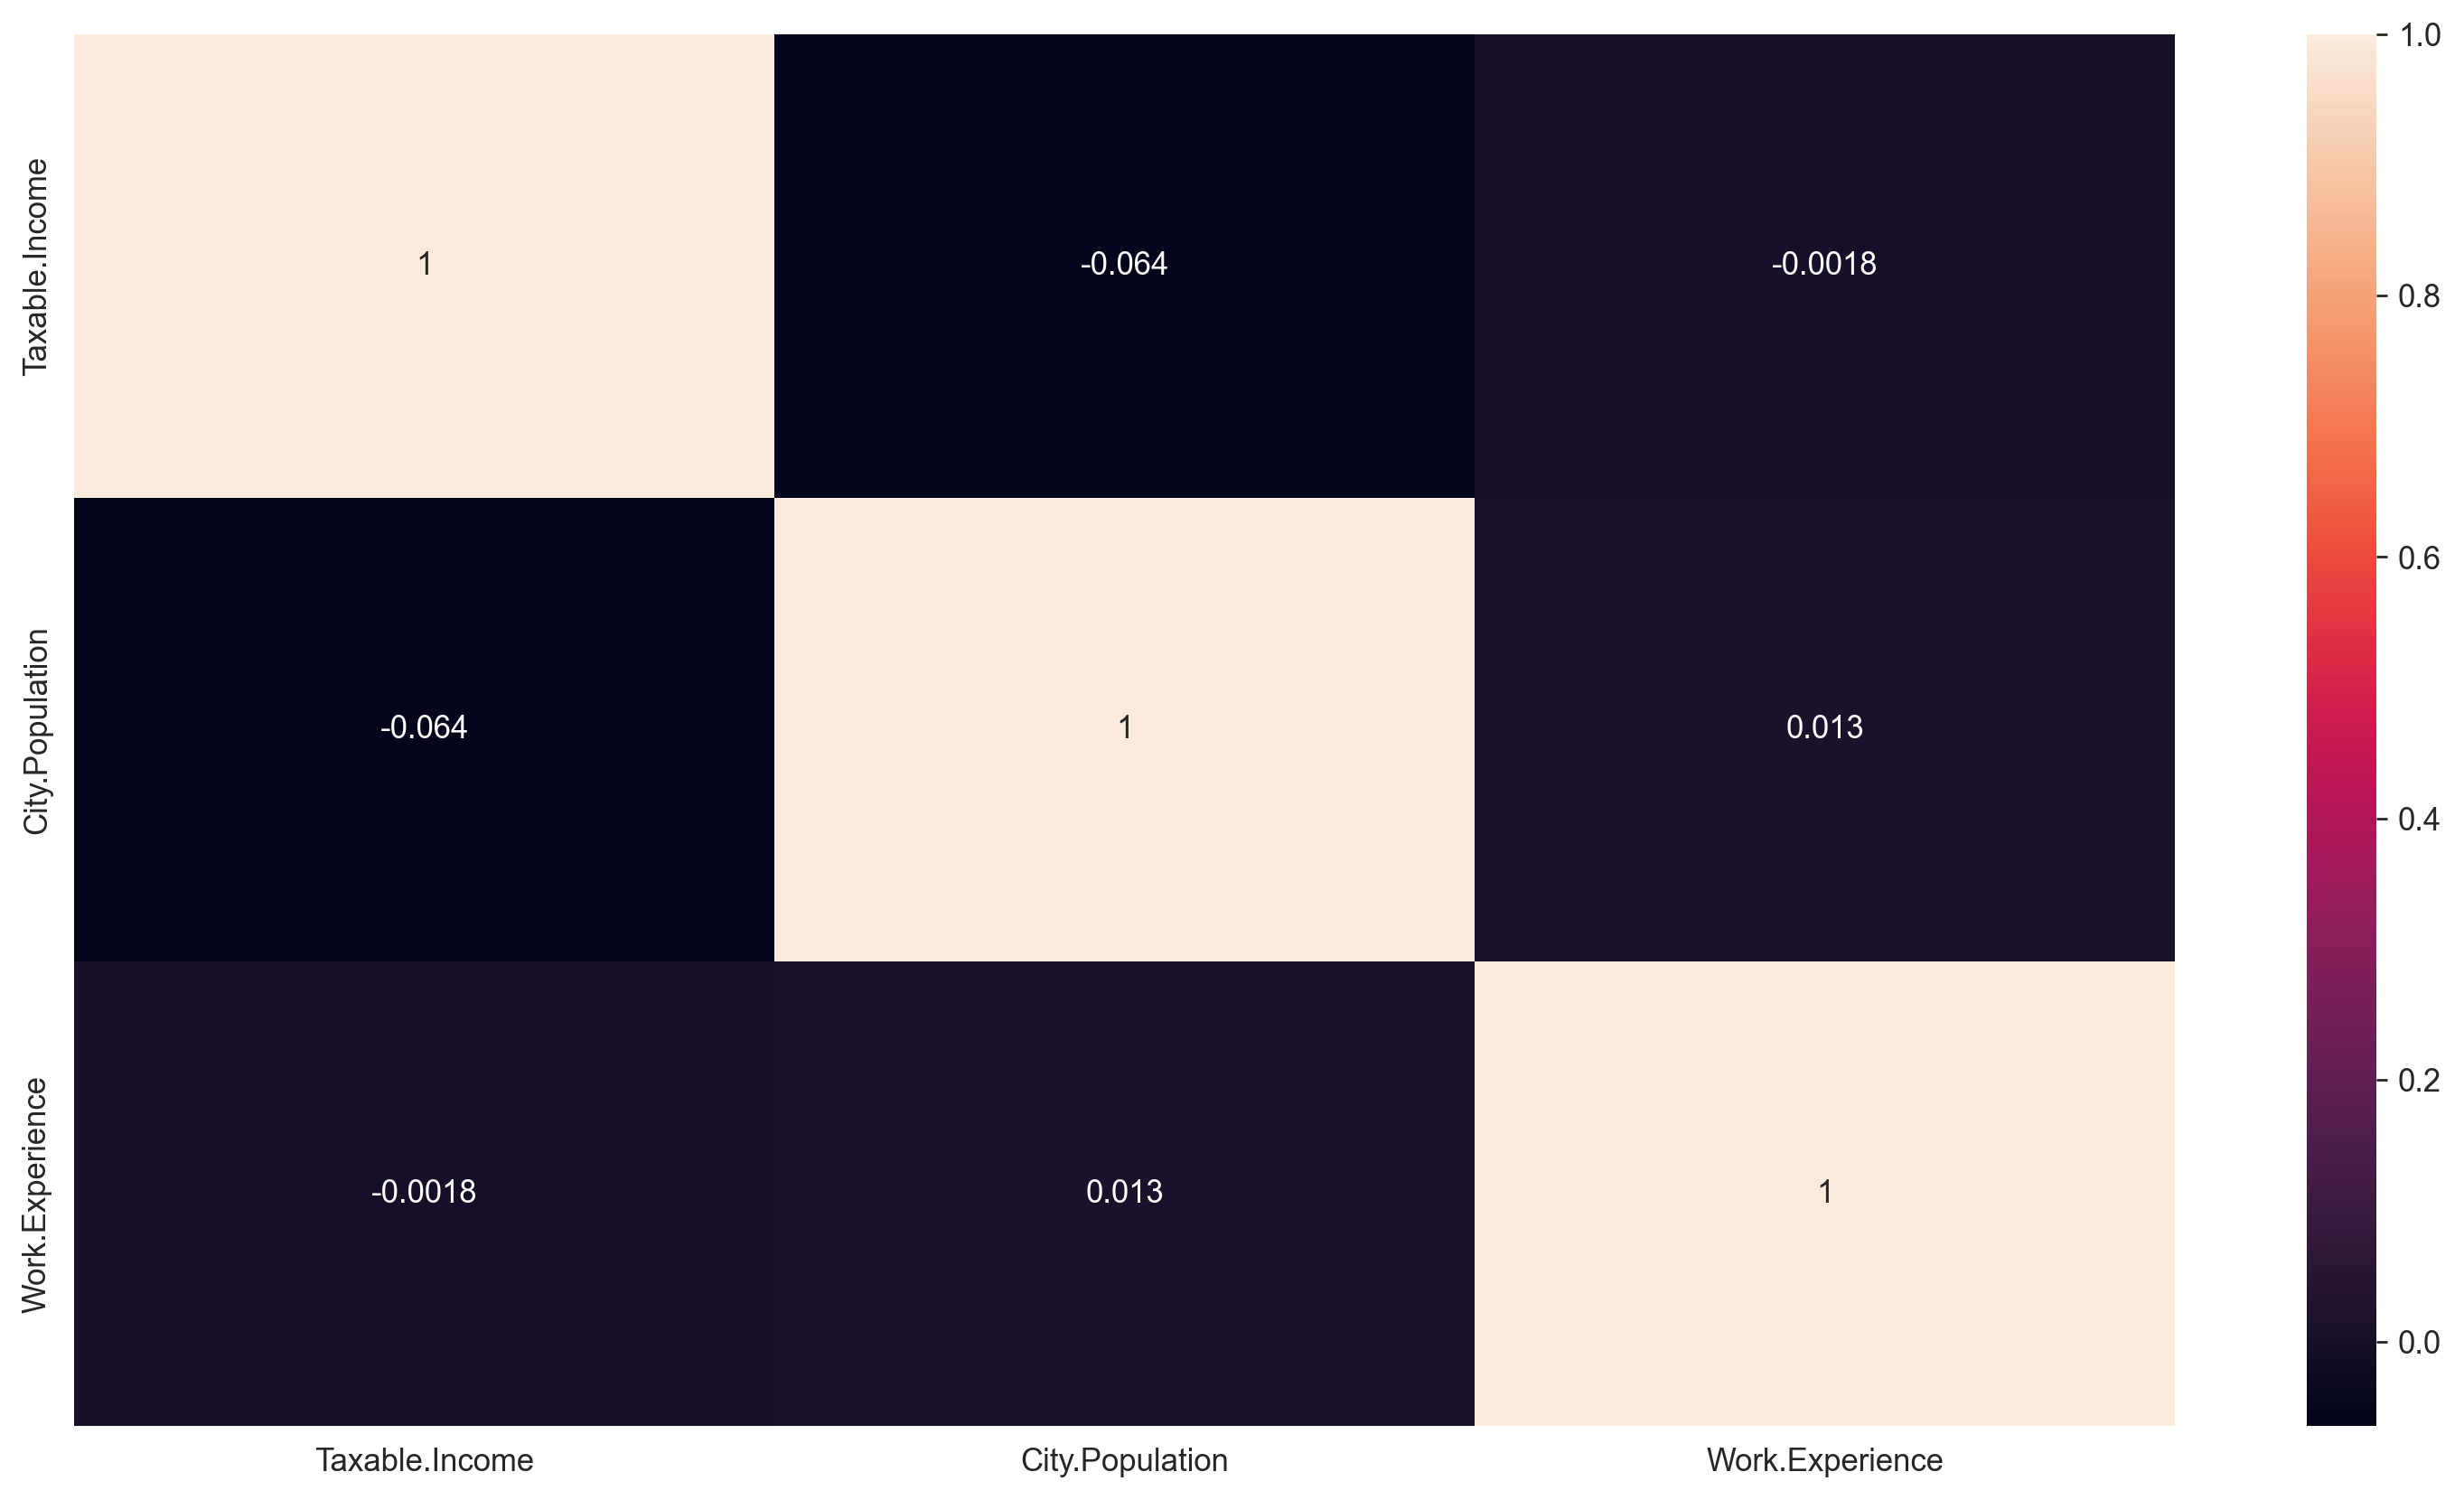

In [15]:
sns.heatmap(fc.corr(), annot=True)

### Creating Status Column With Given Parameter

- treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [16]:
fc['status'] = fc['Taxable.Income'].apply(lambda tax_inc: 'Risky' if tax_inc <= 30000 else 'Good')

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


### Converting Categorical Data to Numerical Data

In [17]:
le = LabelEncoder()

#### Converting Undergrad Data to Numerical Data

In [18]:
fc['Undergrad'] = le.fit_transform(fc['Undergrad'])

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,Single,68833,50047,10,YES,Good
1,1,Divorced,33700,134075,18,YES,Good
2,0,Married,36925,160205,30,YES,Good
3,1,Single,50190,193264,15,YES,Good
4,0,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES,Good
596,1,Divorced,69967,55369,2,YES,Good
597,0,Divorced,47334,154058,0,YES,Good
598,1,Married,98592,180083,17,NO,Good


#### Converting Marital Status Data to Numerical Data

In [19]:
fc['Marital.Status'] = le.fit_transform(fc['Marital.Status'])

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,YES,Good
1,1,0,33700,134075,18,YES,Good
2,0,1,36925,160205,30,YES,Good
3,1,2,50190,193264,15,YES,Good
4,0,1,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,YES,Good
596,1,0,69967,55369,2,YES,Good
597,0,0,47334,154058,0,YES,Good
598,1,1,98592,180083,17,NO,Good


#### Converting Urban Data to Numerical Data

In [20]:
fc['Urban'] = le.fit_transform(fc['Urban'])

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


#### Converting Status Data to Numerical Data

In [21]:
fc['status'] = le.fit_transform(fc['status'])

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


### Outlier Detection

In [22]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [23]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [24]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage

In [25]:
outlier_percentage(fc)

Undergrad : 0.0 %
Marital.Status : 0.0 %
Taxable.Income : 0.0 %
City.Population : 0.0 %
Work.Experience : 0.0 %
Urban : 0.0 %
status : 20.666666666666668 %


## Splitting The Data Into Target and Independent set

In [26]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [29]:
x = fc.iloc[:,:-1]

y = fc['status']

In [30]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


### Normalizing The Dataset

In [31]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [32]:
scaled_x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,-1.040833,1.160800,0.520362,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,-0.821464,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,-0.698292,1.033109,1.634639,0.993355
3,0.960769,1.160800,-0.191666,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,0.985129,-1.630532,1.408261,-1.006689
...,...,...,...,...,...,...
595,0.960769,-1.274445,0.807075,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,0.563672,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,-0.300744,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.656940,1.432197,0.163181,-1.006689


### Splitting The Data Into Training And Testing Set

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [35]:
xtrain

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
546,-1.040833,-0.056822,1.503825,-0.996945,-1.081899,-1.006689
68,-1.040833,1.160800,-1.720903,0.620268,-1.195088,-1.006689
472,-1.040833,-0.056822,0.527428,0.867635,-0.515953,0.993355
4,-1.040833,-0.056822,0.985129,-1.630532,1.408261,-1.006689
187,-1.040833,1.160800,0.916726,-0.987569,-1.195088,0.993355
...,...,...,...,...,...,...
129,0.960769,1.160800,-0.069907,-0.868895,1.181882,-1.006689
144,0.960769,1.160800,0.925969,0.958784,1.521450,0.993355
72,0.960769,-1.274445,-0.529519,-0.008982,1.295072,0.993355
235,-1.040833,-1.274445,0.860354,-0.425758,-0.742332,-1.006689


## Preparing Model From The Dataset

### Creating Model With Default Value

In [36]:
dt_def = DecisionTreeClassifier()
dt_def.fit(xtrain,ytrain)
ypred = dt_def.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        31

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



##### Comparing Training And Testing Accuracy

In [38]:
print('Training Accuracy of are Model is : ' + str(dt_def.score(xtrain,ytrain)))
print('Testing Accuracy of are Model is : ' + str(dt_def.score(xtest, ytest)))

Training Accuracy of are Model is : 1.0
Testing Accuracy of are Model is : 1.0


- As the default value model is a generic model, we will be finishing it.

##### Ploting Decision Tree

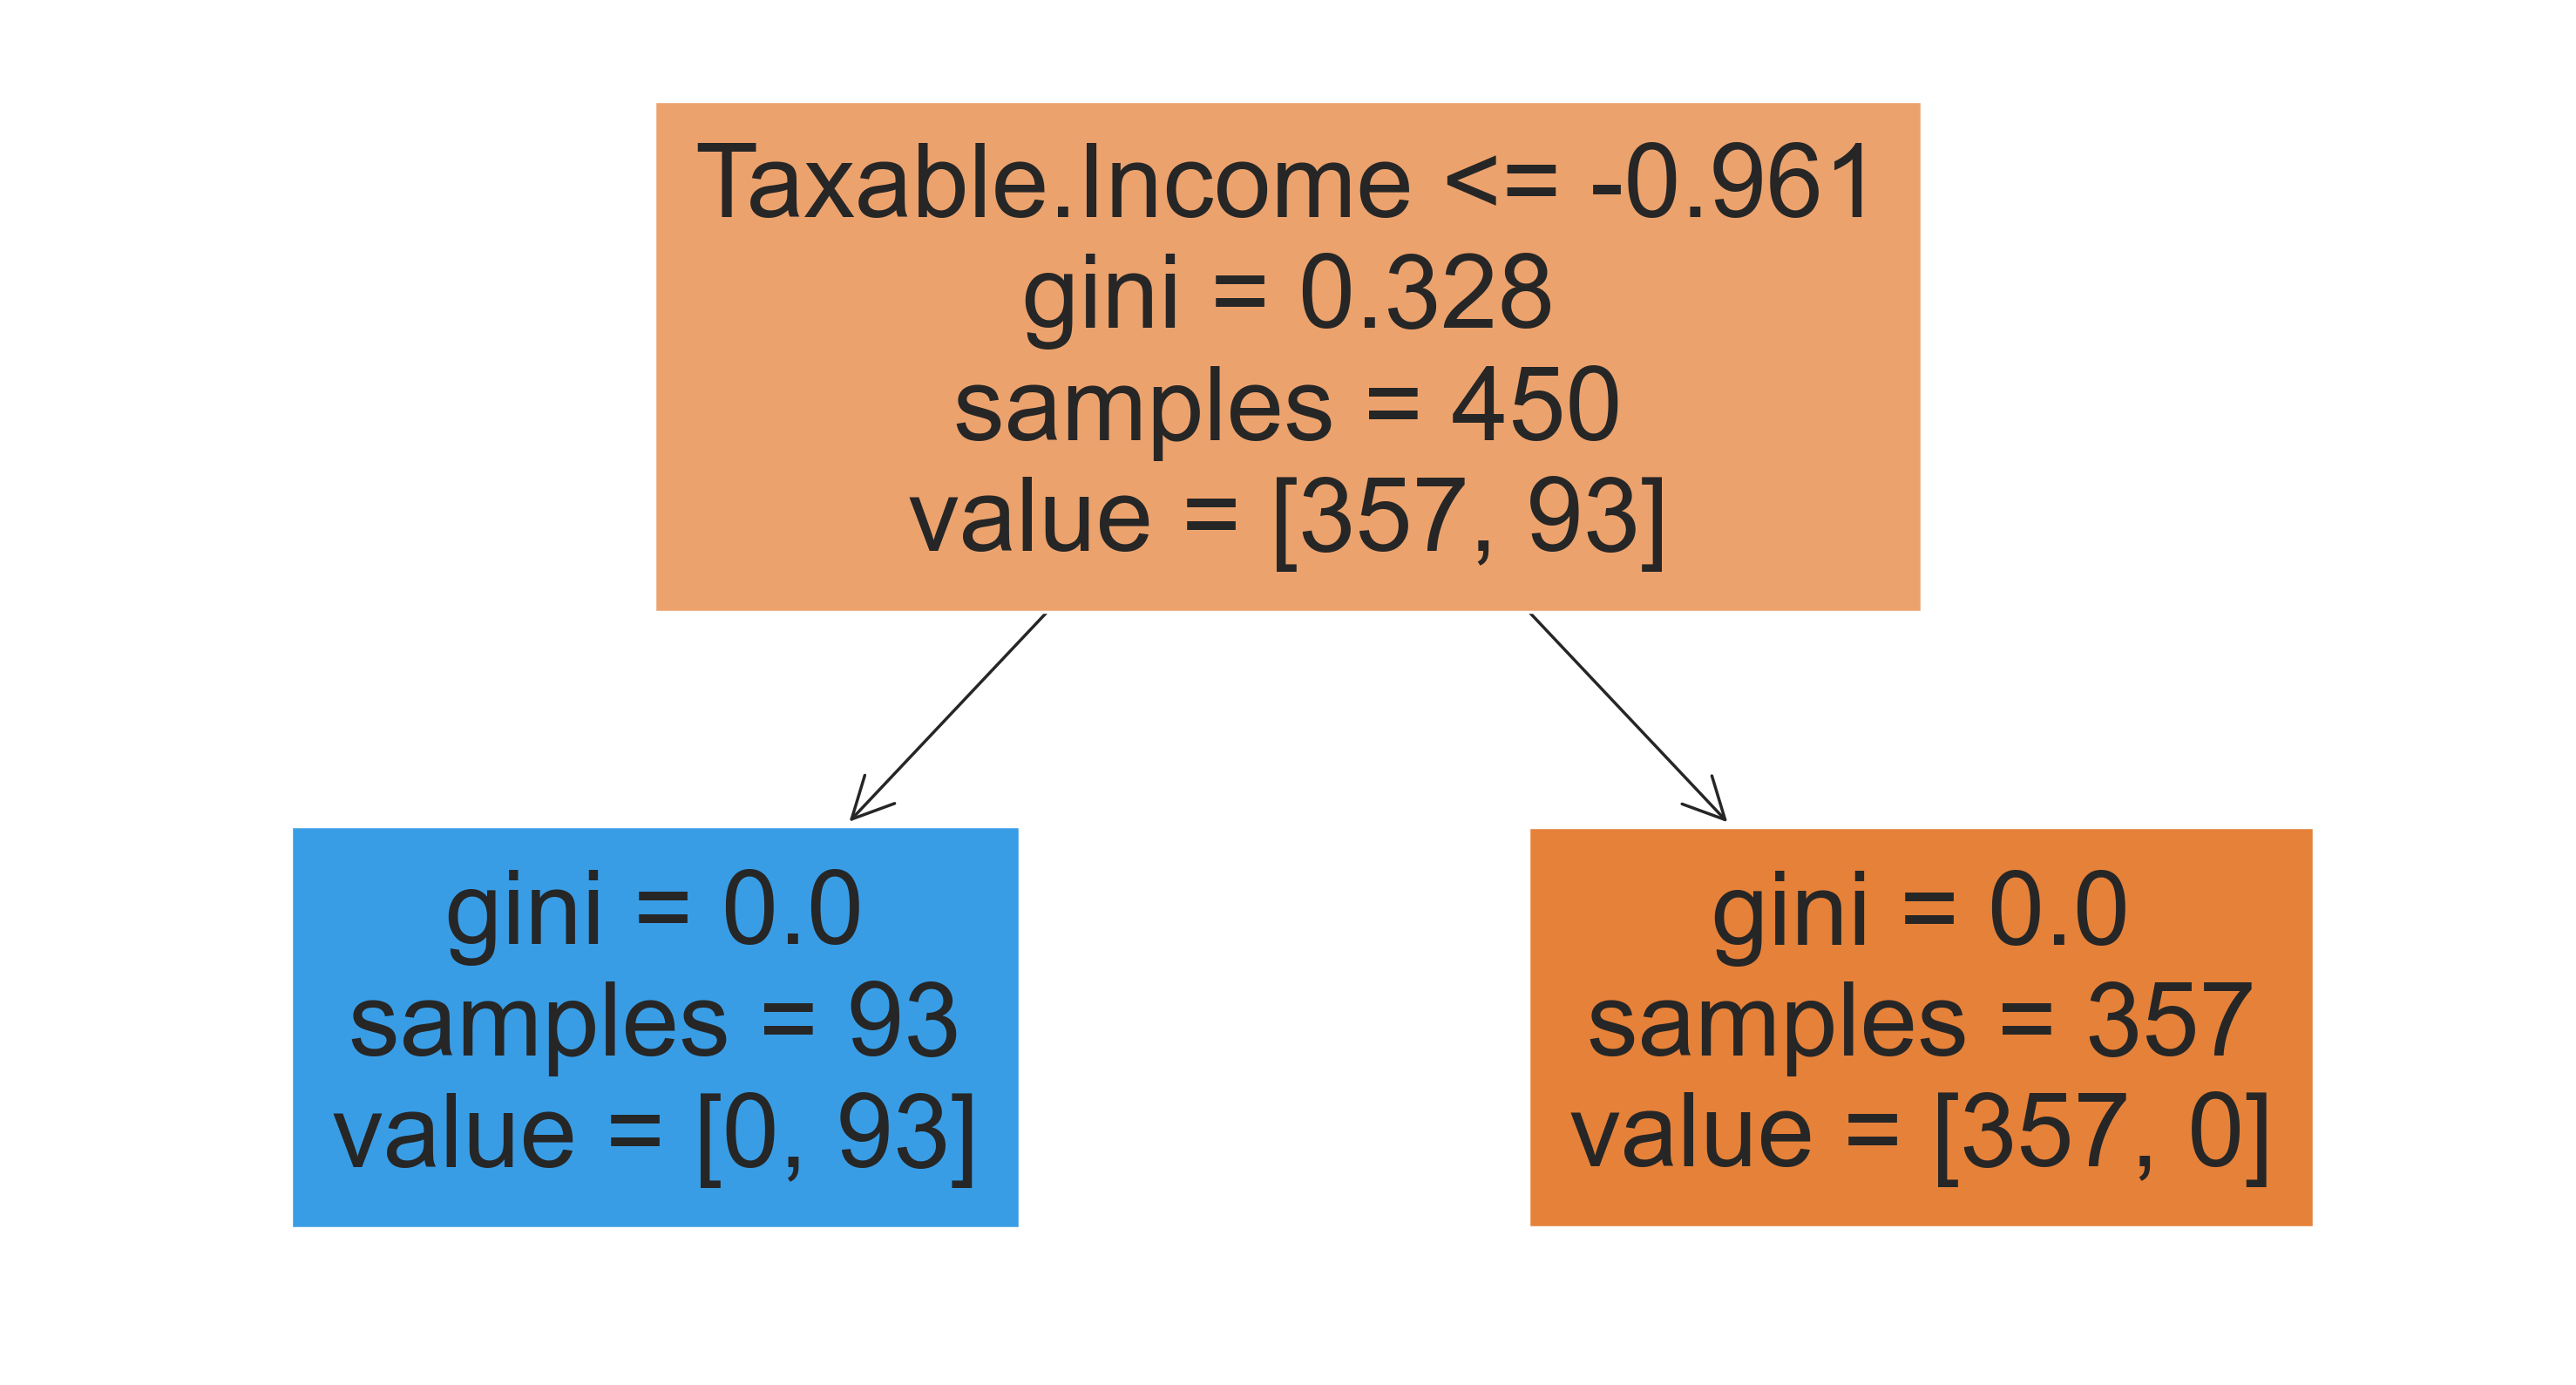

In [39]:
tree.plot_tree(dt_def, feature_names=x.columns, filled=True)
plt.show()